In [0]:
#CNN model for CIFAR-10 dataset


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

In [0]:
cifar = tf.keras.datasets.cifar10

In [3]:
(train_images , train_labels) , (test_images , test_labels) = cifar.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(train_images.shape)
print(len(train_images))
print(len(test_images))
#rain_labels=train_labels.reshape(50000)
print(train_labels)
#test_labels=test_labels.reshape(10000)

(50000, 32, 32, 3)
50000
10000
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


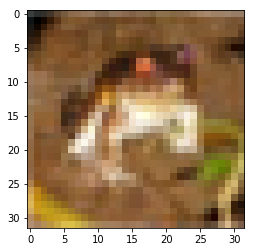

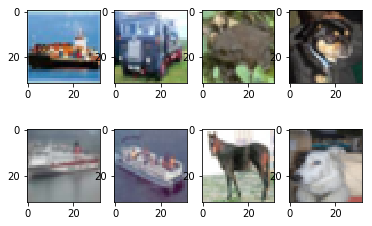

In [5]:
plt.imshow(train_images[0])
fig , a = plt.subplots(2,4)
for i in range (0, 2, 1):
    for j in range (0, 4, 1):
        a[i][j].imshow(train_images[random.randint(0,50000)])
plt.show()

In [6]:
#train_labels = keras.utils.to_categorical(train_labels)
print(train_labels.shape)
print(train_labels)

train_images = train_images/255
train_images = train_images.reshape(50000 , 32,32,3)
test_images = test_images/255 
test_images = test_images.reshape(10000 , 32,32,3)
print(train_images.shape)

(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 32, 32, 3)


In [0]:
def structure():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128 , activation='relu'),
        tf.keras.layers.Dense(10 , activation='softmax')
    ])
    return model

In [8]:
model=structure()
model.summary()

W0322 03:49:02.651508 140568981178240 deprecation.py:506] From /tensorflow-1.15.0/python2.7/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0322 03:49:02.691860 140568981178240 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0322 03:49:02.725178 140568981178240 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['acc']
             )

In [10]:
history=model.fit(train_images , train_labels, epochs=50, validation_split=0.1 )

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 104s 2ms/sample - loss: 2.2422 - acc: 0.1525 - val_loss: 2.2262 - val_acc: 0.1548
Epoch 2/50
45000/45000 [==============================] - 103s 2ms/sample - loss: 2.2135 - acc: 0.1638 - val_loss: 2.2171 - val_acc: 0.1586
Epoch 3/50
45000/45000 [==============================] - 103s 2ms/sample - loss: 2.2011 - acc: 0.1706 - val_loss: 2.2063 - val_acc: 0.1660
Epoch 4/50
45000/45000 [==============================] - 103s 2ms/sample - loss: 2.1912 - acc: 0.1732 - val_loss: 2.2096 - val_acc: 0.1644
Epoch 5/50
45000/45000 [==============================] - 104s 2ms/sample - loss: 2.1836 - acc: 0.1773 - val_loss: 2.2037 - val_acc: 0.1684
Epoch 6/50
45000/45000 [==============================] - 103s 2ms/sample - loss: 2.1767 - acc: 0.1786 - val_loss: 2.2039 - val_acc: 0.1668
Epoch 7/50
45000/45000 [==============================] - 103s 2ms/sample - loss: 2.1691 - acc: 0.1849 - val_lo

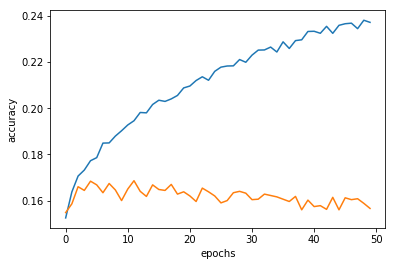

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()